In [1]:
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from PIL import Image

In [2]:
# Define the folder path
folder_path_covid = "Covid-19"

# Create an empty list to store image paths
image_paths_covid = []
images_covid=[]

# Use os.walk to iterate through the folder and its subfolders
for root, directories, files in os.walk(folder_path_covid):
    for filename in files:
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            # Build the image path and append it to the list
            image_path = os.path.join(root, filename)
            image_paths_covid.append(image_path)
            image = cv2.imread(image_path)
            images_covid.append(image)

# Create a list of labels (all "covid" in this case)
labels = ["covid"] * len(image_paths_covid)

# Create a Pandas DataFrame
df_covid = pd.DataFrame(data={
    "image": images_covid,
    "label": labels,
})

# Print the DataFrame
print(" # of Covid Images : " , len(df_covid))
print(df_covid.head())

 # of Covid Images :  825
                                               image  label
0  [[[223, 225, 225], [186, 188, 188], [186, 188,...  covid
1  [[[15, 15, 15], [26, 26, 26], [24, 24, 24], [2...  covid
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  covid
3  [[[5, 5, 5], [5, 5, 5], [5, 5, 5], [5, 5, 5], ...  covid
4  [[[222, 222, 222], [211, 211, 211], [191, 191,...  covid


In [3]:
img = Image.open(image_paths_covid[0])
print("Image size of covid Lungs : ",img.size)    

Image size of covid Lungs :  (128, 128)


In [4]:
# Define the folder path
folder_path_normal = "Normal"

# Create an empty list to store image paths
image_paths_normal = []
images_normal=[]
# Use os.walk to iterate through the folder and its subfolders
for root, directories, files in os.walk(folder_path_normal):
    for filename in files:
        # Check if the file is an image
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            # Build the image path and append it to the list
            image_path = os.path.join(root, filename)
            image_paths_normal.append(image_path)
            image = cv2.imread(image_path)
            images_normal.append(image)
# Create a list of labels (all "covid" in this case)
labels = ["normal"] * len(image_paths_normal)

# Create a Pandas DataFrame
df_normal = pd.DataFrame(data={
    "image": images_normal,
    "label": labels,
})

# Print the DataFrame
print("# of Normal images : " , len(df_normal))
print(df_normal.head())

# of Normal images :  850
                                               image   label
0  [[[22, 22, 22], [19, 19, 19], [19, 19, 19], [1...  normal
1  [[[59, 59, 59], [57, 57, 57], [51, 51, 51], [8...  normal
2  [[[1, 1, 1], [53, 53, 53], [52, 52, 52], [55, ...  normal
3  [[[47, 47, 47], [56, 56, 56], [53, 53, 53], [5...  normal
4  [[[30, 30, 30], [53, 53, 53], [63, 63, 63], [7...  normal


In [5]:
img = Image.open(image_paths_normal[0])
print("Image size of normal Lungs : ",img.size)    

Image size of normal Lungs :  (128, 128)


In [6]:
# Combine dataframes
train_df = pd.concat([df_covid.iloc[:-3], df_normal.iloc[:-3]], ignore_index=True)
print("Train dataframe:",train_df.head())
print("...")
print("# of Training Samples : ", len(train_df))

Train dataframe:                                                image  label
0  [[[223, 225, 225], [186, 188, 188], [186, 188,...  covid
1  [[[15, 15, 15], [26, 26, 26], [24, 24, 24], [2...  covid
2  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  covid
3  [[[5, 5, 5], [5, 5, 5], [5, 5, 5], [5, 5, 5], ...  covid
4  [[[222, 222, 222], [211, 211, 211], [191, 191,...  covid
...
# of Training Samples :  1669


In [7]:
# Combine dataframes
test_df = pd.concat([df_covid.iloc[-3:], df_normal.iloc[-3:]], ignore_index=True)
print("Test dataframe:",test_df.head())
print("...")
print("# of Testing Samples : ", len(test_df))

Test dataframe:                                                image   label
0  [[[51, 51, 51], [51, 51, 51], [50, 50, 50], [4...   covid
1  [[[3, 3, 3], [3, 3, 3], [3, 3, 3], [2, 2, 2], ...   covid
2  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...   covid
3  [[[2, 2, 2], [46, 46, 46], [46, 46, 46], [45, ...  normal
4  [[[0, 0, 0], [51, 51, 51], [75, 75, 75], [84, ...  normal
...
# of Testing Samples :  6


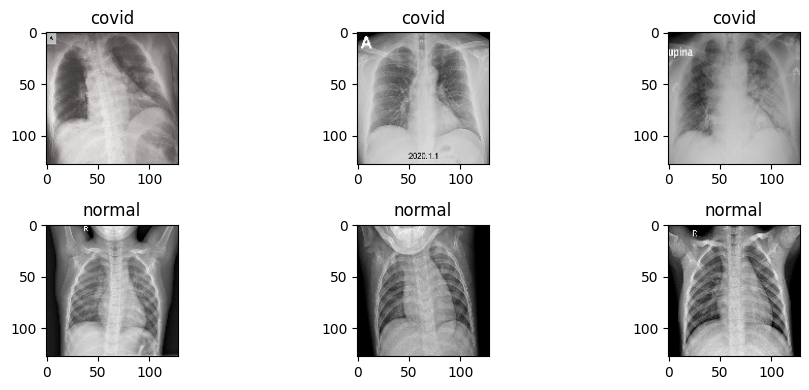

In [8]:
# Display the first three images in df_covid
df_covid_sample = df_covid.head(3)
df_normal_sample = df_normal.head(3)
plt.figure(figsize=(10, 4))

for i in range(3):
    # Convert the string representation of the image to a NumPy array
    image_array = df_covid_sample['image'].iloc[i]
    
    # Create a subplot for each image
    plt.subplot(2, 3, i+1)
    
    # Display the image
    plt.imshow(image_array)
    
    # Set the title as the corresponding label
    plt.title(df_covid_sample['label'].iloc[i])

for i in range(3):
    # Convert the string representation of the image to a NumPy array
    image_array = df_normal_sample['image'].iloc[i]
    
    # Create a subplot for each image
    plt.subplot(2, 3, i+4)
    
    # Display the image
    plt.imshow(image_array)
    
    # Set the title as the corresponding label
    plt.title(df_normal_sample['label'].iloc[i])

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()


In [30]:
# Preprocess the image data
train_images = tf.cast(train_df.iloc[:, 0] / 255.0, dtype=tf.float32)
# Reshape the image data
train_images = train_images.reshape(-1, 128, 128, 3)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encode the class labels
le = LabelEncoder()
train_labels = le.fit_transform(train_df.iloc[:, 1])


In [27]:
# Define the input shape and data type
input_shape = (128, 128, 3)
input_dtype = tf.uint8

# Create the input layer
inputs = tf.keras.Input(shape=input_shape, dtype=input_dtype)

# Preprocess the input
x = tf.cast(inputs, dtype=tf.float32)
x = x / 255.0

# Define the convolutional layers
conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu")(x)
conv1_bn = tf.keras.layers.BatchNormalization()(conv1)
max_pool1 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv1_bn)

conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu")(max_pool1)
conv2_bn = tf.keras.layers.BatchNormalization()(conv2)
max_pool2 = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv2_bn)

# Define the global average pooling layer
gap = tf.keras.layers.GlobalAveragePooling2D()(max_pool2)

# Define the output layer with softmax activation
outputs = tf.keras.layers.Dense(2, activation="softmax")(gap)

# Create the model
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 tf.cast_4 (TFOpLambda)      (None, 128, 128, 3)       0         
                                                                 
 tf.math.truediv_4 (TFOpLam  (None, 128, 128, 3)       0         
 bda)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0   

In [28]:
#compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [29]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).